In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vcffgfg/train.csv


In [2]:
import scipy.stats as stats
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [3]:
df= pd.read_csv('/kaggle/input/vcffgfg/train.csv',usecols=['Age','Fare','Survived'])

In [4]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [5]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [6]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

/tmp/ipykernel_13/694922604.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


In [7]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [8]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [9]:
X=df.iloc[:,1:3]
y=df.iloc[:,0]

In [10]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

/tmp/ipykernel_13/3931694294.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


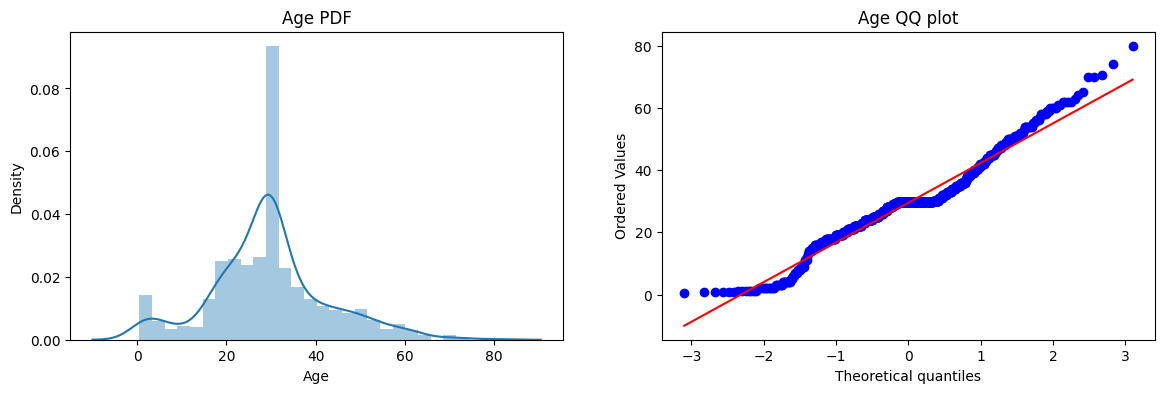

In [11]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'],dist="norm",plot=plt)
plt.title('Age QQ plot')

plt.show()

/tmp/ipykernel_13/2630006866.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


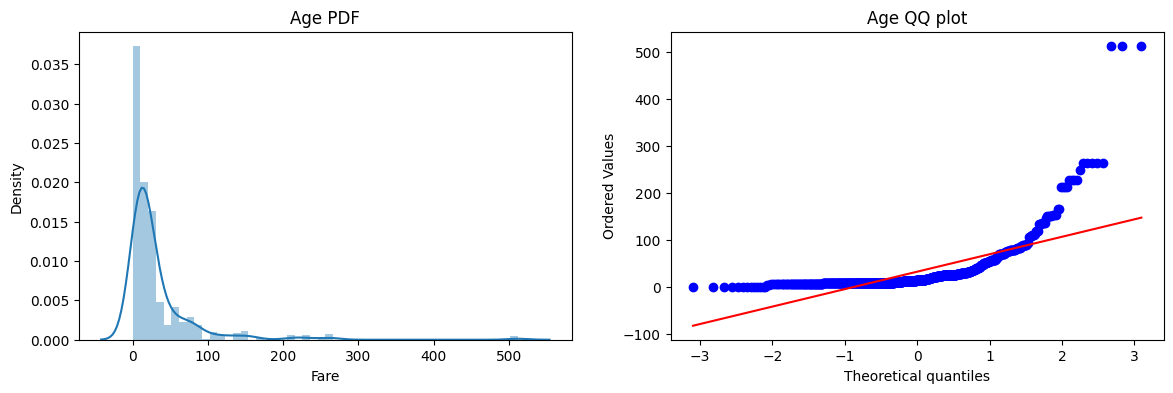

In [12]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'],dist="norm",plot=plt)
plt.title('Age QQ plot')

plt.show()

In [13]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()

In [14]:
clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)

y_pred= clf.predict(X_test)
y_pred1=clf2.predict(X_test)

print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred))

Accuracy LR 0.6480446927374302
Accuracy DT 0.6480446927374302


In [15]:
trf=FunctionTransformer(func=np.log1p)

In [16]:
X_train_transformed=trf.fit_transform(X_train)
X_test_transformed=trf.transform(X_test)

In [17]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()

clf.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)

y_pred=clf.predict(X_test_transformed)
y_pred1=clf2.predict(X_test_transformed)

print("Accuracy LR", accuracy_score(y_test,y_pred))
print("Accuracy DT", accuracy_score(y_test,y_pred1))

Accuracy LR 0.6815642458100558
Accuracy DT 0.6703910614525139


In [18]:
X_transformed=trf.fit_transform(X)

clf=LogisticRegression()
clf2=DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed,y,scoring='accuracy',cv=10)))

LR 0.678027465667915
DT 0.6577652933832709


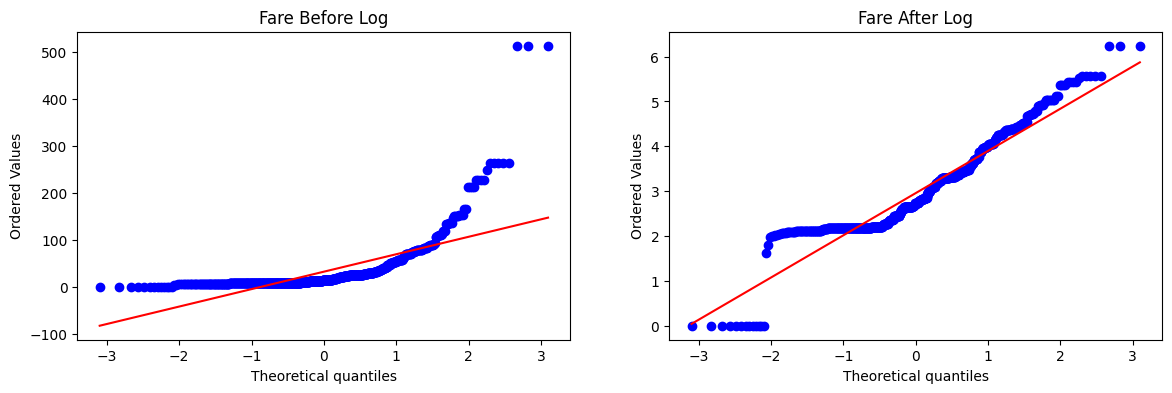

In [19]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'],dist='norm',plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'],dist='norm',plot=plt)
plt.title('Fare After Log')

plt.show()

In [20]:
trf2= ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

X_train_transformed2=trf2.fit_transform(X_train)
X_test_transformed2=trf2.transform(X_test)

In [21]:

clf=LogisticRegression()
clf2=DecisionTreeClassifier()

clf.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)

y_pred=clf.predict(X_test_transformed)
y_pred1=clf2.predict(X_test_transformed)

print("Accuracy LR", accuracy_score(y_test,y_pred))
print("Accuracy DT", accuracy_score(y_test,y_pred1))

Accuracy LR 0.6815642458100558
Accuracy DT 0.6759776536312849


In [22]:
X_transformed2=trf2.fit_transform(X)

clf=LogisticRegression()
clf2=DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed2,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed2,y,scoring='accuracy',cv=10)))

LR 0.6712609238451936
DT 0.6588514357053683


In [23]:
def apply_transform(transform):
    X=df.iloc[:,1:3]
    y=df.iloc[:,0]

    trf=ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')

    X_trans=trf.fit_transform(X)
    clf=LogisticRegression()

    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))

    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'],dist="norm",plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0],dist="norm",plot=plt)
    plt.title('Fare After Transform')

    plt.show()

Accuracy 0.6195131086142323


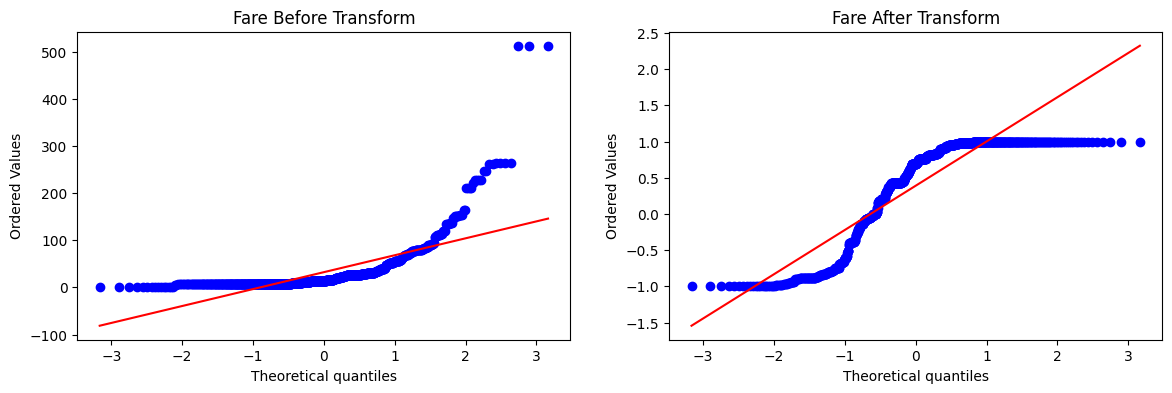

In [24]:
apply_transform(np.sin)